In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [2]:
#read dataset
df=pd.read_csv('zomato.csv')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df.shape

(51717, 17)

In [10]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [11]:
len(df['name'].unique())

8792

In [12]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### getting all NAN features

In [13]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [14]:
#% of missing values
for feature in feature_na:
    print(f'{feature} has {np.round(((df[feature].isnull().sum()/len(df))*100),3)} % missing values')

rate has 15.034 % missing values
phone has 2.336 % missing values
location has 0.041 % missing values
rest_type has 0.439 % missing values
dish_liked has 54.292 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [17]:
df.shape

(43942, 17)

In [18]:
def split(x):
    return x.split('/')[0]

In [19]:
df['rate']=df['rate'].apply(split)

In [20]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [21]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [22]:
df.replace('NEW',0,inplace=True)

In [23]:
df.replace('-',0,inplace=True)

In [24]:
df['rate']=df['rate'].astype(float)

### calculate avg rating of each resturant

<AxesSubplot:xlabel='name'>

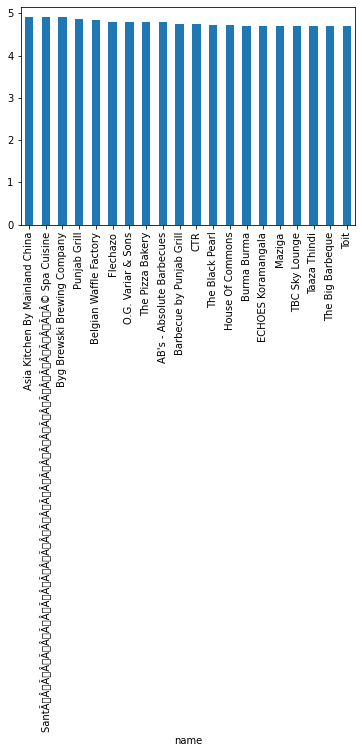

In [25]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [26]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.rating = round(df_rate.rating,2)
df_rate.head(20)

restaurant  rating
0                           #FeelTheROLL    3.40
1                             #L-81 Cafe    3.90
2                                #refuel    3.70
3                               1000 B.C    3.20
4   100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C    3.70
5             11 to 11 Express Biriyanis    3.50
6                     1131 Bar + Kitchen    4.50
7              12th Main - Grand Mercure    4.10
8                          1441 Pizzeria    4.10
9                         1522 - The Pub    4.21
10                    154 Breakfast Club    4.00
11                     1722 Urban Bistro    4.10
12                          18+ Ice Cafe    3.50
13                                  1947    4.02
14                      1980s Games Cafe    3.40
15                    1992 Chats - Space    3.70
16                                   1Q1    4.30
17                          1TO3 Kitchen    3.10
18                              2 Statez    3.70
19         20 Char - Sterlings MAC Hotel    4.00

In [27]:
df_rate.shape

(7162, 2)

#### alternative is create a list in which u have all the restaurants & in another list,we have all ratings & then using zip we can create a dataframe

In [28]:
'''restaurant=[]
avg_rating=[]
for key,name_df in df.groupby('name'):
    restaurant.append(key)
    avg_rating.append(np.mean(name_df['rate'])'''

"restaurant=[]\navg_rating=[]\nfor key,name_df in df.groupby('name'):\n    restaurant.append(key)\n    avg_rating.append(np.mean(name_df['rate'])"

In [29]:
'''df_rate=pd.DataFrame(zip(restaurant,avg_rating))
df_rate.columns=['restaurant','rating']
df_rate.head(20)'''

"df_rate=pd.DataFrame(zip(restaurant,avg_rating))\ndf_rate.columns=['restaurant','rating']\ndf_rate.head(20)"

In [30]:
'''df_rate.shape'''

'df_rate.shape'

##### Rating distribution

<AxesSubplot:xlabel='rating', ylabel='Density'>

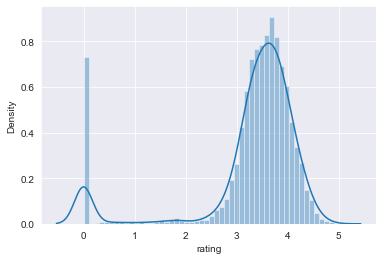

In [31]:
sns.set_style(style='darkgrid')
sns.distplot(df_rate['rating'])

##### Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

#### Which are the top restaurant chains in Bangaluru?

Text(0.5, 0, 'Number of outlets')

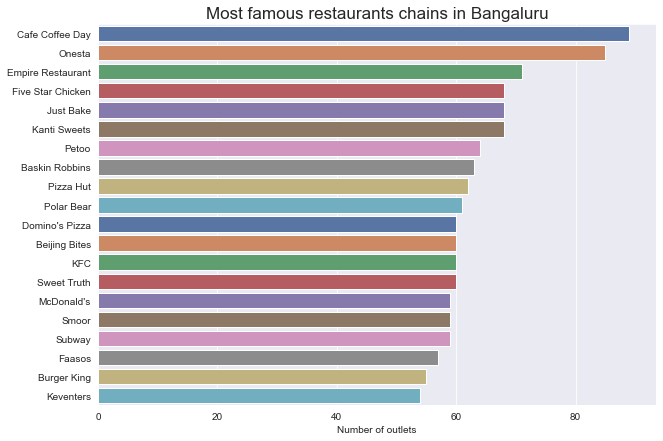

In [32]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru",fontsize = 17)
plt.xlabel("Number of outlets") 

##### How many of the restuarants do not accept online orders?

([<matplotlib.patches.Wedge at 0x2711f13a910>,
 [Text(-0.481488774517003, 0.9890240442042423, 'accepted'),
  Text(0.5252605823084886, -1.0789352717716423, 'not accepted')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.30640200634661835, -0.629378908533458, '35.6%')])

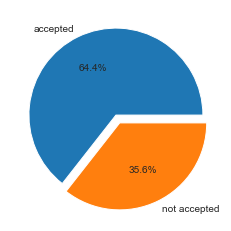

In [33]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%',labels=labels)

##### using plotly, How many of the restuarants do not accept online orders?

In [34]:
!pip install plotly

In [35]:
import plotly.express as px

In [36]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [37]:
fig = px.pie(values=x, names=labels,title='Pie chart')
fig.show()

#### What is the ratio b/w restaurants that provide and do not provide table booking ?

In [38]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [39]:
x=df['book_table'].value_counts()
labels=['not book','book']

In [40]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[ 0.2, 0]
               )

iplot([trace])

#### How many types of restaurants we have?

In [41]:
df['rest_type'].isna().sum()

151

In [42]:
df['rest_type'].dropna(axis = 'index',inplace=True)

In [43]:
len(df['rest_type'].unique())

88

##### now using plotly

In [44]:
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')


iplot([trace1])

#### At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.


## highest voted restaurant

In [45]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= ' highest voted')

iplot([trace1])

### total restaurants at different locations of Bengalore

In [46]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [47]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))


In [48]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values('restaurant').tail(10)

restaurant
location                     
Bellandur                 284
Jayanagar                 311
Bannerghatta Road         362
JP Nagar                  400
Indiranagar               467
Electronic City           518
Marathahalli              525
HSR                       553
BTM                       581
Whitefield                634

<AxesSubplot:xlabel='location'>

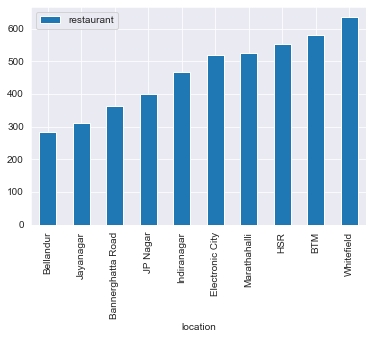

In [49]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()


In [50]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [51]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')


iplot([trace1])

In [52]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Total number of variety of restaurants ie north indian,south Indian

In [53]:
df['cuisines']

0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
51709                      North Indian, Continental
51711    Andhra, South Indian, Chinese, North Indian
51712                                    Continental
51715                                    Finger Food
51716         Finger Food, North Indian, Continental
Name: cuisines, Length: 43942, dtype: object

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

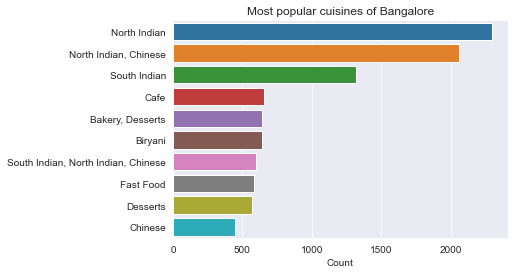

In [54]:

cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [55]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar( 
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')


iplot([trace1])

### We can observe that North Indian,chinese,South Indian and Biriyani are most common.
### It means Bengalore is more influenced by North Indian culture more than South

### Analyse Approx cost for 2 people

In [56]:
len(df['approx_cost(for two people)'].value_counts())

66

In [57]:
df['approx_cost(for two people)'].isna().sum()

252

In [58]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [59]:
df['approx_cost(for two people)'].isna().sum()

0

In [60]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [61]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [62]:
type(df['approx_cost(for two people)'][0])

str

In [63]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [64]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

##### cost vs rating

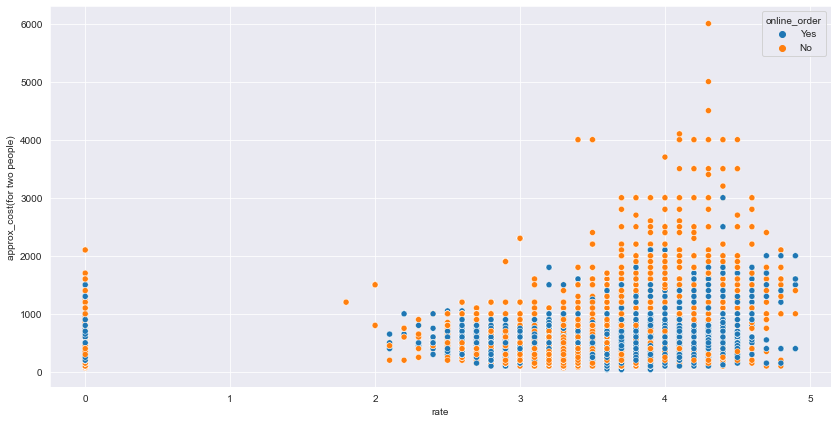

In [65]:
plt.figure(figsize=(14,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

**from this scattterplot,we can come up with a conclusion THAT most of the highest rated restaurants accepts online order and they are in budget**

In [66]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

### Is there any difference b/w price of restaurants accepting and not accepting online orders?

In [67]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

**Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders**

### Cheapest Rate for 2 people

In [68]:
df['approx_cost(for two people)'].min()

40

### Most costly for 2 people

In [69]:
df['approx_cost(for two people)'].max()

6000

In [70]:
df[df['approx_cost(for two people)']==6000]

url  \
19139  https://www.zomato.com/bangalore/le-cirque-sig...   
45618  https://www.zomato.com/bangalore/le-cirque-sig...   

                                                 address  \
19139  The Leela Palace, 23, Old Airport Road, Bangalore   
45618  The Leela Palace, 23, Old Airport Road, Bangalore   

                                         name online_order book_table  rate  \
19139  Le Cirque Signature - The Leela Palace           No        Yes   4.3   
45618  Le Cirque Signature - The Leela Palace           No        Yes   4.3   

       votes                         phone          location    rest_type  \
19139    126  080 30571234\r\n080 30571540  Old Airport Road  Fine Dining   
45618    128    080 30571234\n080 30571540  Old Airport Road  Fine Dining   

                                              dish_liked         cuisines  \
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  French, Italian   
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  French, Italian   

       approx_cost(for two people)  \
19139                         6000   
45618                         6000   

                                            reviews_list menu_item  \
19139  [('Rated 5.0', 'RATED\n  Awesome would be an u...        []   
45618  [('Rated 5.0', 'RATED\n  Awesome would be an u...        []   

      listed_in(type)   listed_in(city)  
19139        Dine-out       Indiranagar  
45618        Dine-out  Old Airport Road

In [71]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

##### distribution of cost for 2 people

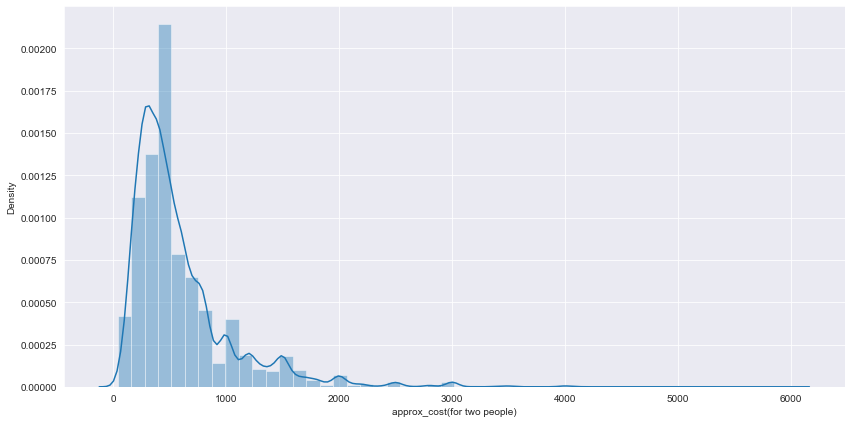

In [72]:
plt.figure(figsize=(14,7))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

##### most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious

### Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant

In [73]:
df[df['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [74]:
data=df.copy()

In [75]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int32
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [76]:
data.set_index('name',inplace=True)

### Top 10 Most Expensive restaurant with approx cost for 2 people

<AxesSubplot:xlabel='name'>

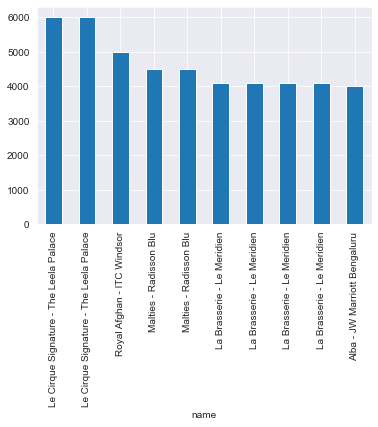

In [77]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

### Top 10 Cheapest restaurant with approx cost for 2 people

In [78]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nsmallest(10).index,
        y = data['approx_cost(for two people)'].nsmallest(10),
        name= 'Priority')
iplot([trace1])

### all the restautant that are below than 500(budget hotel)

In [79]:
data[data['approx_cost(for two people)']<=500]

url  \
name                                                                                                    
Addhuri Udupi Bhojana                               https://www.zomato.com/bangalore/addhuri-udupi...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
The Coffee Shack                                    https://www.zomato.com/bangalore/the-coffee-sh...   
Caf-Eleven                                          https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                                            https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                                                               ...   
Venice Kerala Restaurant                            https://www.zomato.com/bangalore/venice-kerala...   
Thai & Chinese Fast Food                            https://www.zomato.com/bangalore/thai-chinese-...   
The Crunch                                          https://www.zomato.com/bangalore/the-crunch-br...   
Punjabi Charchay                                    https://www.zomato.com/bangalore/punjabi-charc...   
Raapchick                                           https://www.zomato.com/bangalore/raapchick-bro...   

                                                                                              address  \
name                                                                                                    
Addhuri Udupi Bhojana                               1st Floor, Annakuteera, 3rd Stage, Banashankar...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  12,29 Near PES University Back Gate, D'Souza N...   
The Coffee Shack                                        6th Block, 3rd Stage, Banashankari, Bangalore   
Caf-Eleven                                          111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                                            504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
...                                                                                               ...   
Venice Kerala Restaurant                            Opposite Brookfield Mall, Shiva Temple Road, B...   
Thai & Chinese Fast Food                            7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
The Crunch                                            33/1, Kundalahalli Road, Brookefield, Bangalore   
Punjabi Charchay                                    7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
Raapchick                                           Opposite Brookefield Mall, Kundanhalli, Brooke...   

                                                   online_order book_table  \
name                                                                         
Addhuri Udupi Bhojana                                        No         No   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley          Yes         No   
The Coffee Shack                                            Yes        Yes   
Caf-Eleven                                                   No         No   
T3H Cafe                                                     No         No   
...                                                         ...        ...   
Venice Kerala Restaurant                                     No         No   
Thai & Chinese Fast Food                                     No         No   
The Crunch                                                   No         No   
Punjabi Charchay                                             No         No   
Raapchick                                                   Yes         No   

                                                    rate  votes  \
name                                                              
Addhuri Udupi Bhojana                                3.7     88   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley   4.1    402   
The Coffee Shack                                     4.2    164   
Caf-Eleven      

### Total no. of Restaurants that have better rating >4 and that are under budget too ie less than 500

In [80]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

### Total such various  affordable hotels at different location

In [81]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
    
    

In [82]:
len(location)

68

In [83]:
len(total)

68

In [84]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)


In [87]:
location_df.head(20)

restaurant
location                      
BTM                         54
Banashankari                25
Banaswadi                    3
Bannerghatta Road           19
Basavanagudi                31
Basaveshwara Nagar           3
Bellandur                   20
Brigade Road                11
Brookefield                 16
Church Street                8
City Market                  1
Commercial Street            4
Cunningham Road              4
Domlur                       5
Ejipura                      1
Electronic City             23
Frazer Town                 15
HBR Layout                   3
HSR                         58
Hebbal                       1

In [88]:
type(location)

list

Text(0, 0.5, 'Total restaurants')

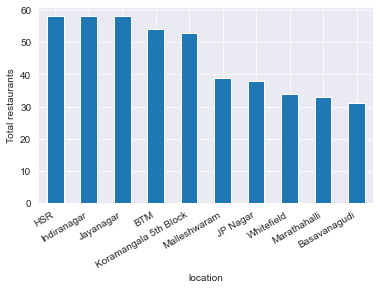

In [90]:

location_df['restaurant'].nlargest(10).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

In [93]:
trace1 = go.Bar( 
        x = location_df['restaurant'].nlargest(10).index,
        y = location_df['restaurant'].nlargest(10),
        name= 'Priority')
iplot([trace1])

# To Visualise what are the names of those hotels

In [107]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(location_df['name'].unique())
    

In [108]:
afford=pd.DataFrame(zip(location,total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()

res_names
location                                                            
BTM                [eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff...
Banashankari       [CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Banaswadi          [Pooja Dosa Camp, Corner House Ice Cream, The ...
Bannerghatta Road  [BOX8- Desi Meals, Krishna Kuteera, Krishna Ku...
Basavanagudi       [Kabab Magic, Sri Guru Kottureshwara Davangere...

### Finding Best budget Restaurants in any location

###### we will pass location and restaurant type as parameteres,function will return name of restaurants.

In [95]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) 
              & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [96]:
return_budget('BTM',"Cafe")

array(['Kullad Cafe', 'Insta Cafe', 'Black Cup Cafe', 'Cafe 221B',
       'Coco Barista', 'Cafe Orio', 'Cafe Longing'], dtype=object)

### Which are the foodie areas?

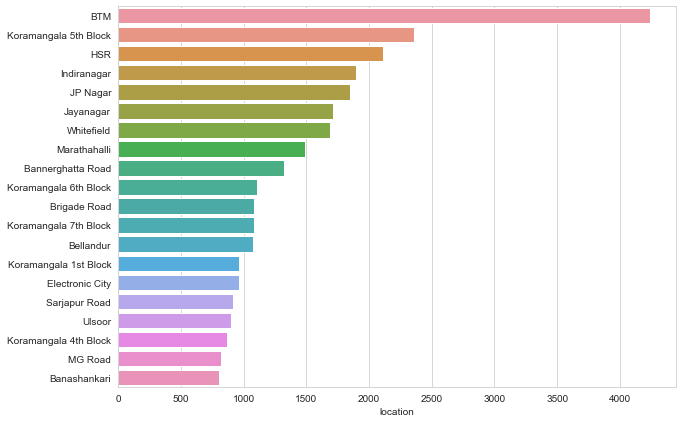

In [111]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)

In [97]:
Restaurant_locations=df['location'].value_counts()[:20]
trace1 = go.Bar( 
        x = Restaurant_locations.index,
        y = Restaurant_locations,
        name= 'Priority')
iplot([trace1])

#### We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
#### BTM dominates the section by having more than 4000 restaurants.

### geographical analysis

#### I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [98]:
df.shape

(43690, 17)

In [99]:
len(df['location'].unique())

92

In [102]:
locations=pd.DataFrame({"Name":df['location'].unique()})


In [103]:
locations['new_Name']='Bangalore '+locations['Name']

In [104]:
locations.head()

Name                      new_Name
0        Banashankari        Bangalore Banashankari
1        Basavanagudi        Bangalore Basavanagudi
2         Mysore Road         Bangalore Mysore Road
3           Jayanagar           Bangalore Jayanagar
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout

In [105]:
!pip install geopy

In [106]:
from geopy.geocoders import Nominatim

In [107]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [108]:
locations['geo_loc']=lat_lon

In [109]:
locations.head()

Name                      new_Name  \
0        Banashankari        Bangalore Banashankari   
1        Basavanagudi        Bangalore Basavanagudi   
2         Mysore Road         Bangalore Mysore Road   
3           Jayanagar           Bangalore Jayanagar   
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout   

                            geo_loc  
0          (15.8876779, 75.7046777)  
1          (12.9417261, 77.5755021)  
2          (12.3872141, 76.6669626)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [110]:
locations.to_csv('zomato_locations.csv',index=False)

##### We have found out latitude and longitude of each location listed in the dataset using geopy.
##### This is used to plot maps.

In [111]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [112]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

##### now combine both the dataframes

In [113]:
locations.head()

Name                      new_Name  \
0        Banashankari        Bangalore Banashankari   
1        Basavanagudi        Bangalore Basavanagudi   
2         Mysore Road         Bangalore Mysore Road   
3           Jayanagar           Bangalore Jayanagar   
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout   

                            geo_loc  
0          (15.8876779, 75.7046777)  
1          (12.9417261, 77.5755021)  
2          (12.3872141, 76.6669626)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [114]:
locations.shape

(92, 3)

In [115]:
Rest_locations.shape

(92, 2)

In [116]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

Name  count                         new_Name  \
0                    BTM   4237                    Bangalore BTM   
1  Koramangala 5th Block   2358  Bangalore Koramangala 5th Block   
2                    HSR   2113                    Bangalore HSR   
3            Indiranagar   1892            Bangalore Indiranagar   
4               JP Nagar   1849               Bangalore JP Nagar   

                              geo_loc  
0  (45.95485055, -112.49659530324134)  
1             (12.9343774, 77.628415)  
2                (18.1475, 41.538889)  
3            (12.9732913, 77.6404672)  
4            (12.2655944, 76.6465404)

In [117]:
Restaurant_locations.shape

(91, 4)

In [120]:
Restaurant_locations['count'].max()

4237

In [121]:
type(Restaurant_locations['geo_loc'][0])

tuple

In [122]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [125]:
Restaurant_locations.isna().sum()

Name        0
count       0
new_Name    0
geo_loc     0
dtype: int64

In [127]:
Restaurant_locations['geo_loc'][0][0]

45.95485055

In [128]:
Restaurant_locations['geo_loc'][0][1]

-112.49659530324134

In [129]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9343774, 77.628415),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.8870547, 77.5969483), (12.9400321, 77.6203272),
       (12.9302645, 77.6332585), (40.28745, -76.964526),
       (12.93577245, 77.66676103753434), (14.5395813, 121.070371),
       (-6.18940725, 106.96671554738951), (12.9252241, 77.6367015),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (29.4534927, -98.6440138), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (50.7721586, 0.09772783661369303),
       (24.593839, 73.6968527), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (51.373656, -0.1042366),
       (13.0093455, 77.6377094), (13.0318541, 77.5700947),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.

In [130]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [131]:
type(lat)

tuple

In [132]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [138]:
Restaurant_locations.head()

Name  count                         new_Name  \
0                    BTM   4237                    Bangalore BTM   
1  Koramangala 5th Block   2358  Bangalore Koramangala 5th Block   
2                    HSR   2113                    Bangalore HSR   
3            Indiranagar   1892            Bangalore Indiranagar   
4               JP Nagar   1849               Bangalore JP Nagar   

                              geo_loc        lat         lon  
0  (45.95485055, -112.49659530324134)  45.954851 -112.496595  
1             (12.9343774, 77.628415)  12.934377   77.628415  
2                (18.1475, 41.538889)  18.147500   41.538889  
3            (12.9732913, 77.6404672)  12.973291   77.640467  
4            (12.2655944, 76.6465404)  12.265594   76.646540

In [134]:
!pip install folium

In [135]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [137]:
basemap

In [139]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 4237.0],
 [12.9343774, 77.628415, 2358.0],
 [18.1475, 41.538889, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1711.0],
 [44.3730577, -71.6118577, 1688.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.8870547, 77.5969483, 1318.0],
 [12.9400321, 77.6203272, 1103.0],
 [12.9302645, 77.6332585, 1084.0],
 [40.28745, -76.964526, 1084.0],
 [12.93577245, 77.66676103753434, 1078.0],
 [14.5395813, 121.070371, 964.0],
 [-6.18940725, 106.96671554738951, 963.0],
 [12.9252241, 77.6367015, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.93433385, 77.63040639553275, 864.0],
 [29.4534927, -98.6440138, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 745.0],
 [13.0027353, 77.5703253, 657.0],
 [12.9417261, 77.5755021, 628.0],
 [50.7721586, 0.09772783661369303, 626.0],
 [24.593839, 73.6968527, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.996845, 77.6130165, 574.0],
 [51.373656, -0.1042366

In [140]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [141]:
basemap

##### It is clear that restaurants tend to concentrate in central bangalore area. <br> <br>The cluster of restaurants lowers are we move away from central.


#### note heatmap is good when we have latitude,longitude or imporatnce of that particular place or count of that place

### Heatmap of North Indian restaurants

In [142]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [143]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [148]:
north_india=pd.DataFrame(df['location'].value_counts().reset_index())
north_india.columns=['Name','count']
north_india.head()

Name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [149]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [150]:
north_india.head()

Name  count                         new_Name  \
0                    BTM   4237                    Bangalore BTM   
1  Koramangala 5th Block   2358  Bangalore Koramangala 5th Block   
2                    HSR   2113                    Bangalore HSR   
3            Indiranagar   1892            Bangalore Indiranagar   
4               JP Nagar   1849               Bangalore JP Nagar   

                              geo_loc  
0  (45.95485055, -112.49659530324134)  
1             (12.9343774, 77.628415)  
2                (18.1475, 41.538889)  
3            (12.9732913, 77.6404672)  
4            (12.2655944, 76.6465404)

In [151]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)


In [152]:
north_india.drop(['geo_loc'],axis=1)

Name  count                         new_Name        lan  \
0                     BTM   4237                    Bangalore BTM  45.954851   
1   Koramangala 5th Block   2358  Bangalore Koramangala 5th Block  12.934377   
2                     HSR   2113                    Bangalore HSR  18.147500   
3             Indiranagar   1892            Bangalore Indiranagar  12.973291   
4                JP Nagar   1849               Bangalore JP Nagar  12.265594   
..                    ...    ...                              ...        ...   
87         West Bangalore      5         Bangalore West Bangalore  13.001129   
88              Yelahanka      4              Bangalore Yelahanka  13.100698   
89   Rajarajeshwari Nagar      2   Bangalore Rajarajeshwari Nagar  12.927441   
90                 Peenya      1                 Bangalore Peenya  13.032942   
91             Nagarbhavi      1             Bangalore Nagarbhavi  12.954674   

           lon  
0  -112.496595  
1    77.628415  
2    41.538889  
3    77.640467  
4    76.646540  
..         ...  
87   77.632562  
88   77.596345  
89   77.515522  
90   77.527325  
91   77.512172  

[91 rows x 5 columns]

In [153]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

###### What about South Indian cuisines?

In [154]:
df3= df[df['cuisines']=='South Indian']
south_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['Name','count']
south_india=south_india.merge(locations,on="Name",how='left').dropna()
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)


In [155]:
south_india=south_india.drop(['geo_loc'],axis=1)

In [156]:
south_india.head()

Name  count                     new_Name        lan  \
0                BTM    262                Bangalore BTM  45.954851   
1       Banashankari     35       Bangalore Banashankari  15.887678   
2          Banaswadi      9          Bangalore Banaswadi  13.014162   
3  Bannerghatta Road     60  Bangalore Bannerghatta Road  12.887055   
4       Basavanagudi     17       Bangalore Basavanagudi  12.941726   

          lon  
0 -112.496595  
1   75.704678  
2   77.651854  
3   77.596948  
4   77.575502

In [157]:
basemap=generateBaseMap()
HeatMap(south_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

##### analysing Reviews of Particular Restaurant

In [1]:
df.head()

NameError: name 'df' is not defined

In [202]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [203]:
data=df['reviews_list'][0].lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [ ]:
import re
data2=re.sub('[^a-zA-Z]',' ',data)
data2

In [205]:
data3=re.sub('rated', ' ',data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [206]:
data4=re.sub('x',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

##### remove multiple spaces

In [207]:
re.sub(' +',' ',data4)

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

#### analyse review of a particular restaurant

In [208]:
dataset=df[df['rest_type']=='Quick Bites']

In [209]:
type(dataset['reviews_list'][3])

str

In [210]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)
 

(-0.5, 799.5, 799.5, -0.5)

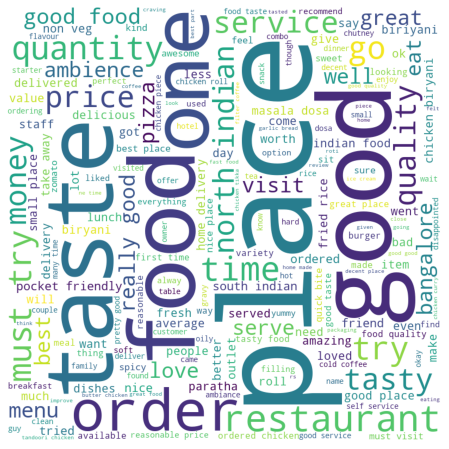

In [211]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

In [212]:
def importance(restaurant):
    dataset=df[df['rest_type']==restaurant]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate(total_review) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 

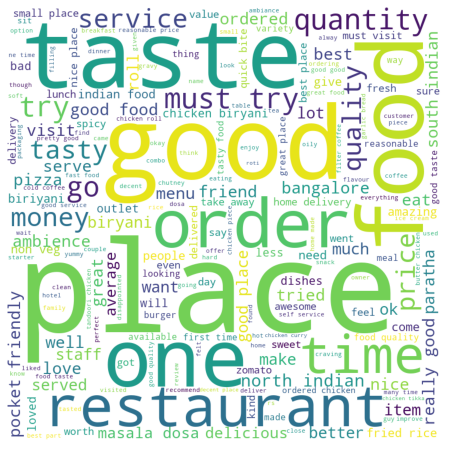

In [213]:
importance('Quick Bites')